In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1) Ping-Pong:  

In [33]:
!mpicxx PingPong.cpp -o pingpong

In [34]:
!mpirun -n 4 --allow-run-as-root ./pingpong 1000

Processor 2 passed the ball to Processor 3; Pass #2
Processor 2 passed the ball to Processor 0; Pass #4
Processor 2 passed the ball to Processor 1; Pass #7
Processor 2 passed the ball to Processor 1; Pass #12
Processor 2 passed the ball to Processor 1; Pass #14
Processor 3 passed the ball to Processor 2; Pass #3
Processor 3 passed the ball to Processor 2; Pass #6
Processor 3 passed the ball to Processor 1; Pass #9
Processor 3 passed the ball to Processor 2; Pass #11
Processor 3 passed the ball to Processor 2; Pass #19
Processor 0 started the game, passing to Processor 2
Processor 0 passed the ball to Processor 3; Pass #5
Processor 2 passed the ball to Processor 0; Pass #20
Processor 2 passed the ball to Processor 0; Pass #23
Processor 2 passed the ball to Processor 3; Pass #28
Processor 0 passed the ball to Processor 1; Pass #16
Processor 0 passed the ball to Processor 3; Pass #18
Processor 0 passed the ball to Processor 1; Pass #21
Processor 0 passed the ball to Processor 3; Pass #24


In [35]:
!mpicxx PingPong2.cpp -o pingpong2

In [36]:
!mpirun -n 4 --allow-run-as-root ./pingpong2 1000

Message size: 0 Bytes, Time per message: 0.530736 µs, Bandwidth: 0 MB/s
Message size: 1 Bytes, Time per message: 0.585872 µs, Bandwidth: 1.70686 MB/s
Message size: 2 Bytes, Time per message: 0.553938 µs, Bandwidth: 3.61051 MB/s
Message size: 4 Bytes, Time per message: 0.604781 µs, Bandwidth: 6.61396 MB/s
Message size: 8 Bytes, Time per message: 0.619657 µs, Bandwidth: 12.9104 MB/s
Message size: 16 Bytes, Time per message: 0.738553 µs, Bandwidth: 21.664 MB/s
Message size: 32 Bytes, Time per message: 0.698831 µs, Bandwidth: 45.7908 MB/s
Message size: 64 Bytes, Time per message: 0.725983 µs, Bandwidth: 88.1564 MB/s
Message size: 128 Bytes, Time per message: 0.911359 µs, Bandwidth: 140.45 MB/s
Message size: 256 Bytes, Time per message: 1.11548 µs, Bandwidth: 229.497 MB/s
Message size: 512 Bytes, Time per message: 1.06365 µs, Bandwidth: 481.362 MB/s
Message size: 1024 Bytes, Time per message: 1.44612 µs, Bandwidth: 708.1 MB/s
Message size: 2048 Bytes, Time per message: 1.77485 µs, Bandwidth

## Plotting part

In [37]:
data = pd.read_csv('mpi_ping_pong_results.csv')

In [38]:
num_iterations = 1000

In [39]:
data["Total time(sec)"] = data["TimePerMessage(µs)"] * num_iterations * 1e-6

data["# iterations"] = num_iterations

latency_for_zero_bytes = data[data["MessageSize(Bytes)"] == 0]["TimePerMessage(µs)"].values[0]
print("Latency =", latency_for_zero_bytes)

print(data.to_string(index=False))

Latency = 0.530736
 MessageSize(Bytes)  TimePerMessage(µs)  Bandwidth(MB/s)  Total time(sec)  # iterations
                  0            0.530736          0.00000         0.000531          1000
                  1            0.585872          1.70686         0.000586          1000
                  2            0.553938          3.61051         0.000554          1000
                  4            0.604781          6.61396         0.000605          1000
                  8            0.619657         12.91040         0.000620          1000
                 16            0.738553         21.66400         0.000739          1000
                 32            0.698831         45.79080         0.000699          1000
                 64            0.725983         88.15640         0.000726          1000
                128            0.911359        140.45000         0.000911          1000
                256            1.115480        229.49700         0.001115          1000
             

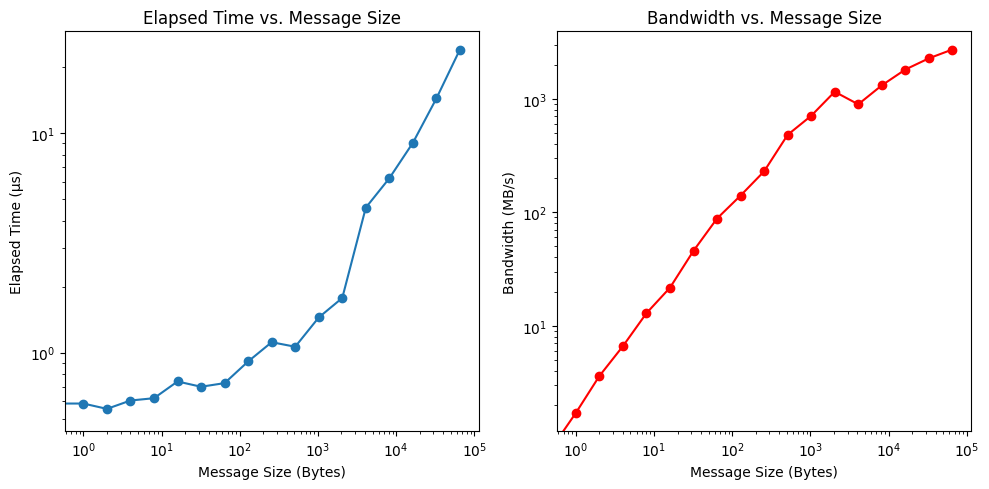

In [40]:
plt.figure(figsize=(10, 5))

# Plotting Time
plt.subplot(121)
plt.loglog(data['MessageSize(Bytes)'], data['TimePerMessage(µs)'], marker='o')
plt.xlabel('Message Size (Bytes)')
plt.ylabel('Elapsed Time (µs)')
plt.title('Elapsed Time vs. Message Size')

# Plotting Bandwidth
plt.subplot(122)
plt.loglog(data['MessageSize(Bytes)'], data['Bandwidth(MB/s)'], marker='o', color='red')
plt.xlabel('Message Size (Bytes)')
plt.ylabel('Bandwidth (MB/s)')
plt.title('Bandwidth vs. Message Size')

plt.tight_layout()
plt.show()

## 2) Cellular Automata 1-d

In [60]:
!mpicc CellularAutomata1D.c -o cellular_automata

In [61]:
!mpirun -n 1 --allow-run-as-root ./cellular_automata 1024 100 00011110 0
!mpirun -n 2 --allow-run-as-root ./cellular_automata 1024 100 00011110 0
!mpirun -n 4 --allow-run-as-root ./cellular_automata 1024 100 00011110 0
!mpirun -n 6 --allow-run-as-root ./cellular_automata 1024 100 00011110 0
!mpirun -n 8 --allow-run-as-root ./cellular_automata 1024 100 00011110 0

Max simulation time: 0.008514 seconds
Max simulation time: 0.008581 seconds
Max simulation time: 0.008921 seconds
Max simulation time: 0.008949 seconds
Max simulation time: 0.008643 seconds


In [43]:
def plot_state(data, title):
    plt.figure(figsize=(12, 6))
    plt.imshow(data, cmap='Greys', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.show()

def plot_speedup(process_counts, times):
    speedups = [times[0] / t for t in times]
    plt.figure()
    plt.plot(process_counts, speedups, marker='o')
    plt.title('Speedup by Number of Processes')
    plt.xlabel('Number of Processes')
    plt.ylabel('Speedup')
    plt.grid(True)
    plt.show()


In [44]:
def plot_speedup(process_counts, times):
    base_time = times[0]
    speedups = [base_time / time for time in times]

    plt.figure(figsize=(8, 5))
    plt.plot(process_counts, speedups, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Processes')
    plt.ylabel('Speedup')
    plt.title('Speedup vs. Number of MPI Processes')
    plt.grid(True)
    plt.xticks(process_counts)
    plt.show()




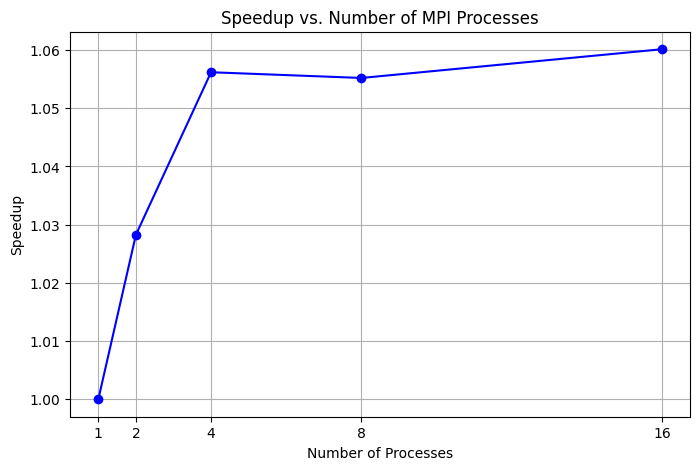

In [55]:
process_counts = [1, 2, 4, 8, 16]
times = [0.009060, 0.008811, 0.008578, 0.008586 , 0.008546]  # Add manualy from output

plot_speedup(process_counts, times)

I do not know why but collab can not parallelise or do it for np = 1 like for np = maximum nuber of processes. You can watch screens from cmd from my computer what allows only 2 threads in my github repository.

Now I understand it is stupid to fight with Collab in triyng to parallelize (as it was not recommended on seminar)

## 3 rules

In [56]:
!mpicc CellularAutomata1D.c -o cellular_automata_rules

In [57]:
!mpirun -n 4 --allow-run-as-root --oversubscribe ./cellular_automata_rules 1024 100 00011110 0
!mpirun -n 4 --allow-run-as-root --oversubscribe ./cellular_automata_rules 1024 100 01011010 0
!mpirun -n 4 --allow-run-as-root --oversubscribe ./cellular_automata_rules 1024 100 01101110 0

Max simulation time: 0.008639 seconds
Max simulation time: 0.008877 seconds
Max simulation time: 0.008871 seconds


In [48]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    return np.loadtxt(filename)

def plot_state(data, title, filename):
    plt.figure(figsize=(12, 6))
    plt.imshow(data, cmap='Greys', interpolation='nearest', aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.savefig(filename)  # Save the plot as an image file
    #plt.close()



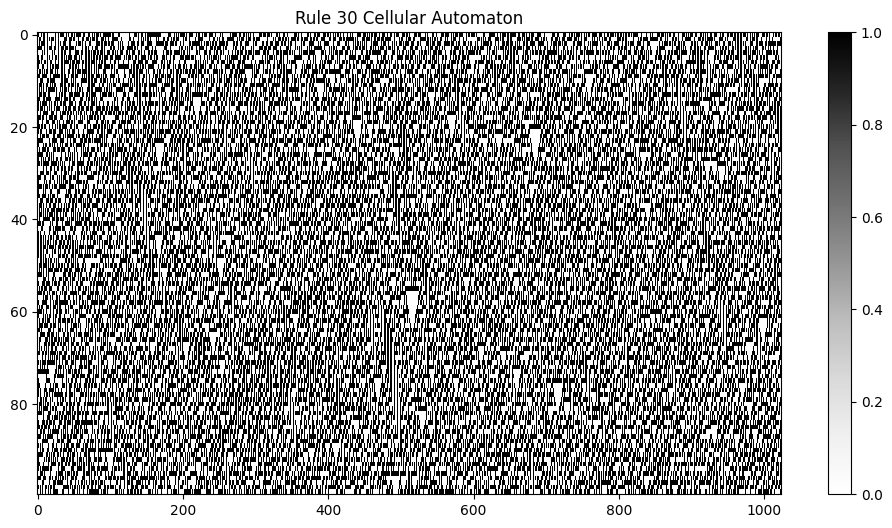

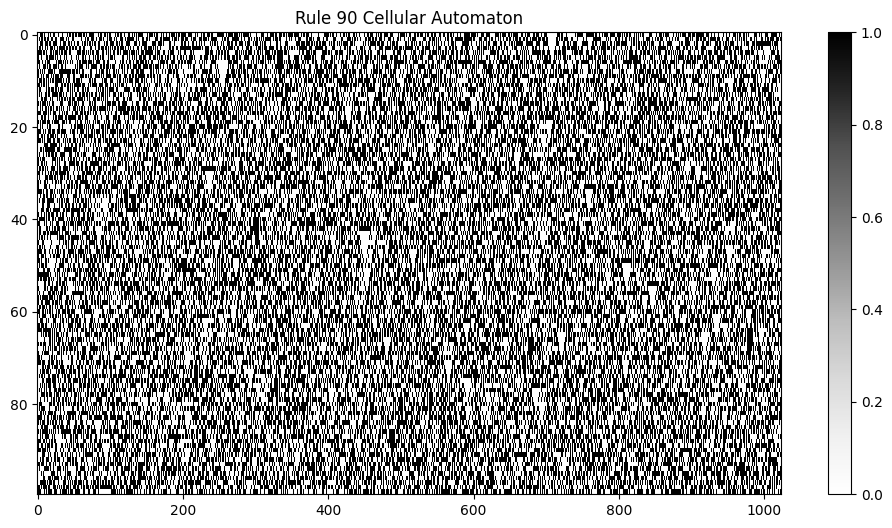

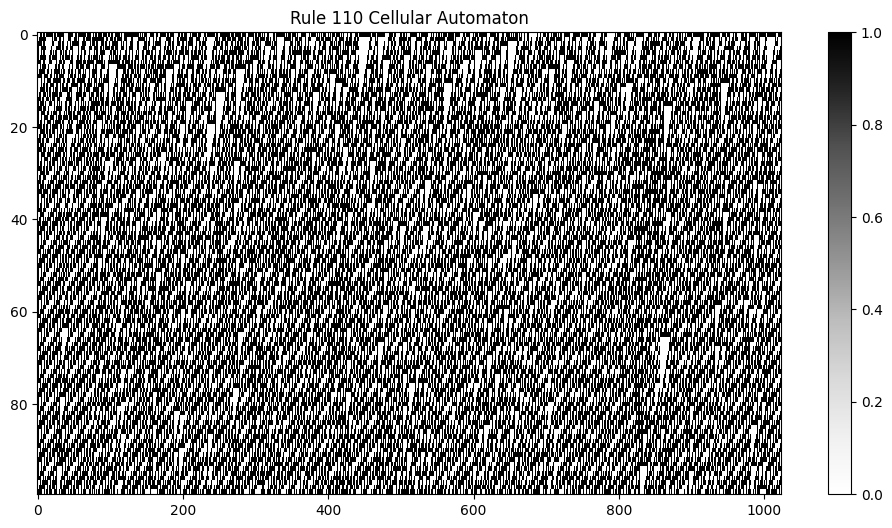

In [49]:
# Read data from files
data_rule30 = read_data('output_rule_30.txt')
data_rule90 = read_data('output_rule_90.txt')
data_rule110 = read_data('output_rule_110.txt')

# Plot data
plot_state(data_rule30, 'Rule 30 Cellular Automaton', 'rule30.png')
plot_state(data_rule90, 'Rule 90 Cellular Automaton', 'rule90.png')
plot_state(data_rule110, 'Rule 110 Cellular Automaton', 'rule110.png')